# 예측 결과 출력
* predictionResult 변수에 Str 타입으로 예측결과를 입력해주세요.
* 그 이후 순서대로 실행하시면 됩니다.

순서
1. 이미지 로드(샘플)
2. 예측 결과에서 이미지 로드

In [1]:
import requests
import time
import urllib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import json
import elasticsearch5

# 한글 출력준비

* 네이버 나눔고딕 폰트 등을 설치 또는 사용
* 폰트를 새로 설치 했다면 아래 실행
    ```
    import matplotlib as mpl
    mpl.font_manager._rebuild()
    ```

* 한글 폰트 사용하려면 관련 폰트를 등록하면 된다. (나의 경우는 나눔코딩 폰트)
    ```
    path = 'c:\\windows\\fonts\\nanumgothiccoding.ttf'
    font_name = fm.FontProperties(fname=path, size=50).get_name()
    plt.rc('font', family=font_name)
    ```


In [2]:
path = 'c:\\windows\\fonts\\nanumgothiccoding.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# 예측 결과 로딩

In [3]:
import csv
with open(r'c:\Users\wmp\TensorFlow\DeepInterestNetwork\din\wepick_pred.csv') as csvfile:
    reader = csv.reader(csvfile)
    pred_dic = {}
    for row in reader:
        history = row[1].split('-')
        preds = list(map(lambda x: x.split('/'), row[2].split(':')))
        pred_dic[row[0]] = (history, preds)            

# Elastic Search 를 이용

In [6]:
es = elasticsearch5.Elasticsearch('twiceSpark1:9200')

def es_search(es, deal_ids):
    res = es.search(index='ojm4', body={'query': {'ids':{'values':deal_ids}}}, size=100)
    n = res['hits']['total']
    dic = {}
    for hit in res['hits']['hits']:
        dic[hit['_id']] =  hit['_source']
    return dic
    

In [8]:
def show_preds(pred):
    candidates = list(map(lambda x: x[0], pred[1]))
    res = es_search(es, candidates)
    img_base_url=r'http://img.wemep.co.kr/'
    
    i = 0
    for prod, slot, prob in pred[1]:
        i+=1
        if prod in res:
            title = res[prod]['_2']
            img = res[prod]['_3']
            #print('{}.{}.prod {}.slot {}.prob {}'.format(title, img, prod, slot, prob))
            
            f = urllib.request.urlopen(img_base_url+img)        
            # read the image file in a numpy array
            a = plt.imread(f, format='jpg')
            plt.imshow(a)
            plt.title("{}[{}] score:{} {}".format(i, slot, prob, title))
            plt.show()

        else:
            print('no entry for product {}.slot {}.prob {}'.format(prod, slot, prob))

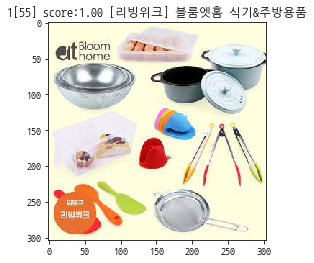

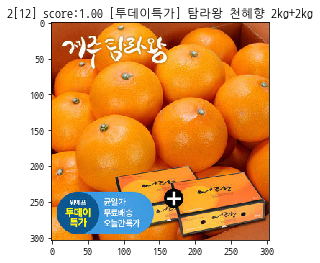

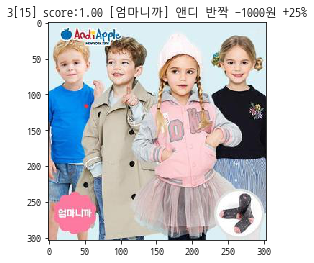

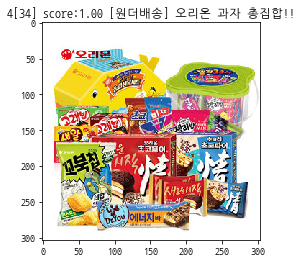

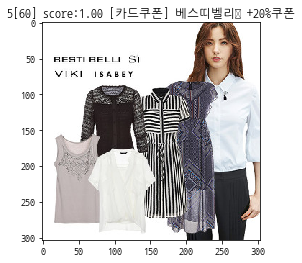

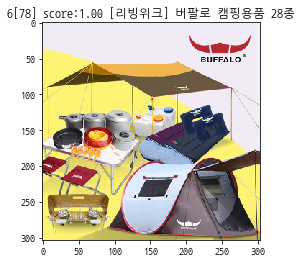

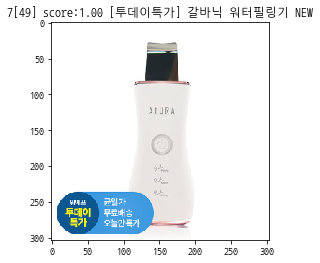

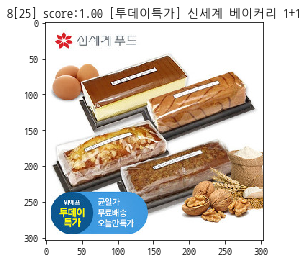

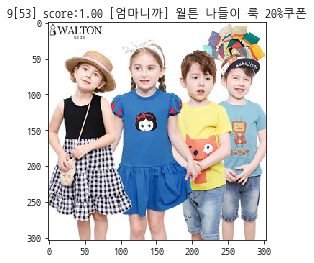

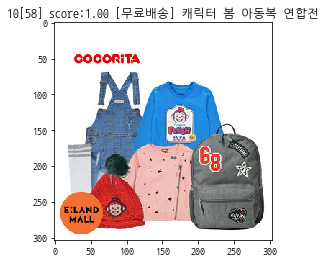

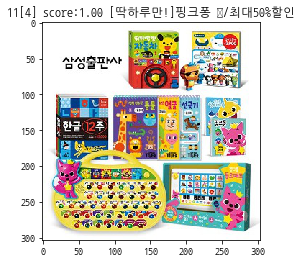

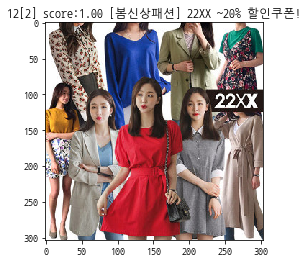

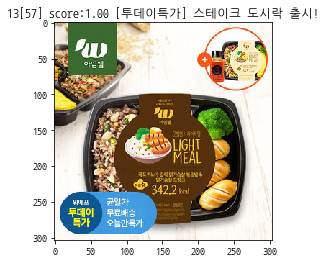

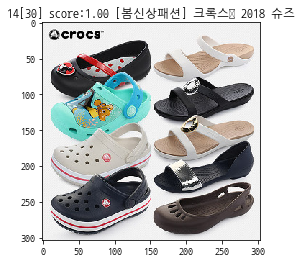

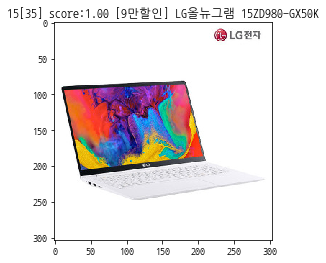

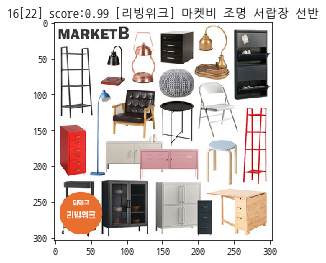

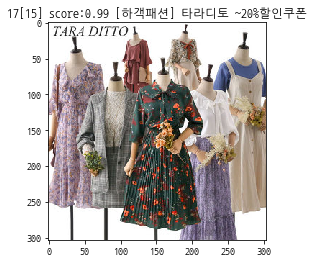

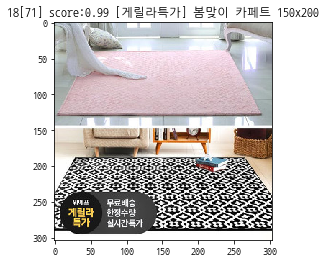

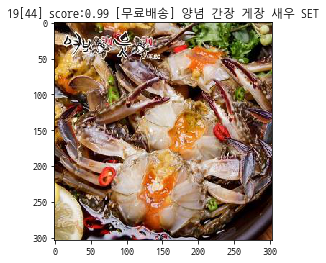

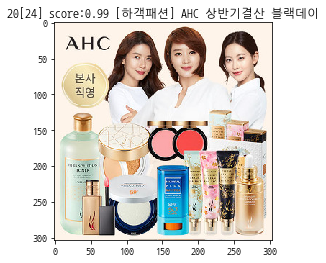

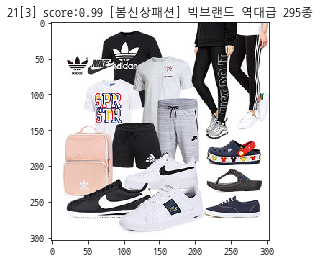

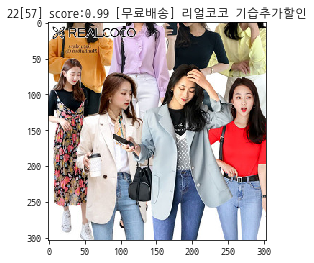

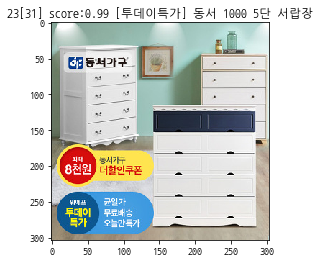

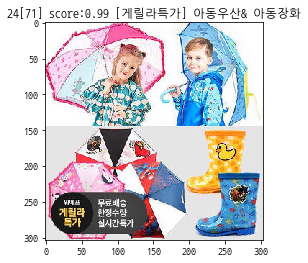

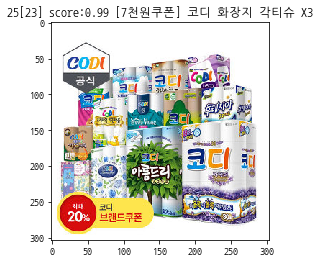

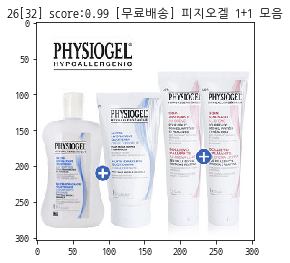

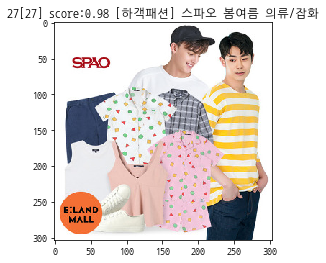

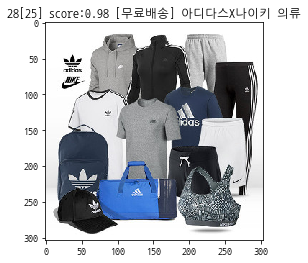

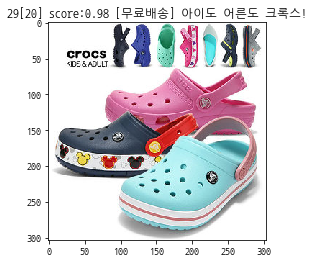

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
show_preds(pred_dic['18605128'])